In [7]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 

In [23]:
df = pd.read_csv('USArrests.csv', index_col=0) 
df

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [29]:
#print(df)
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())
print(df.tail())

(50, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000
            Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska      

In [30]:
#classe de calcul
from fanalysis.pca import PCA

#demander une acp normée
acp = PCA(std_unit=True,stats=True,col_labels=df.columns,row_labels=df.index)

#acp à partir de la matrice numpy
acp.fit(df.values)

PCA(col_labels=Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object'),
    row_labels=Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='rownames'))

In [34]:
#affichage des valeurs propres
acp.eig_

array([[  2.48024158,   0.98976515,   0.35656318,   0.17343009],
       [ 62.00603948,  24.74412881,   8.91407951,   4.33575219],
       [ 62.00603948,  86.75016829,  95.66424781, 100.        ]])

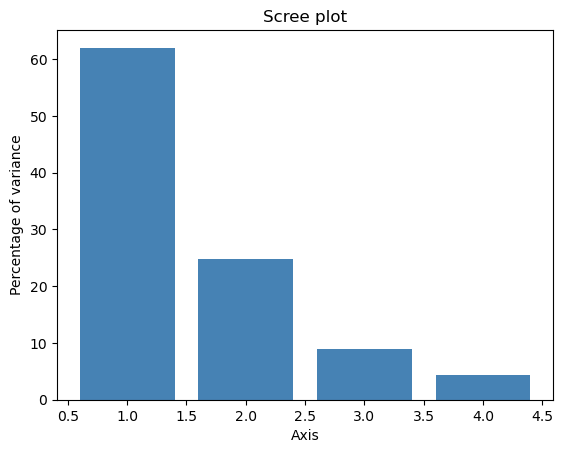

In [32]:
#éboulis des val.p (variance expliquée)
acp.plot_eigenvalues(type="percentage")

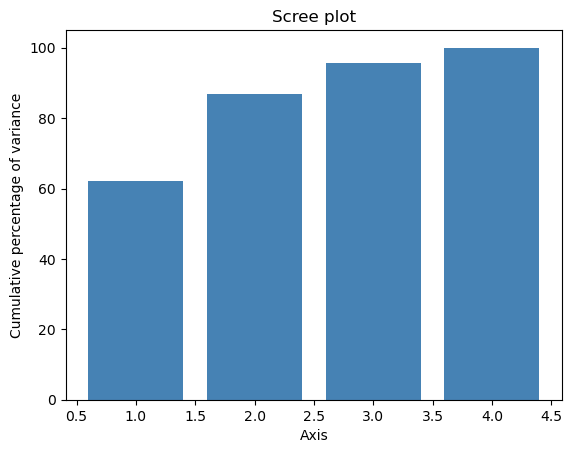

In [8]:
#cumulatif
acp.plot_eigenvalues(type="cumulative")

In [27]:
#informations sur les variables
info_var = acp.col_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_contrib_dim1', 'col_contrib_dim2', 'col_contrib_dim3',
       'col_contrib_dim4', 'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3',
       'col_cos2_dim4'],
      dtype='object')

In [35]:
#coordonnées des var. = corrélations avec les axes
info_var[['col_contrib_dim1','col_contrib_dim2']]

,col_contrib_dim1,col_contrib_dim2
Murder,28.718825,17.487524
Assault,34.010315,3.533859
UrbanPop,7.739016,76.179065
Rape,29.531844,2.799553


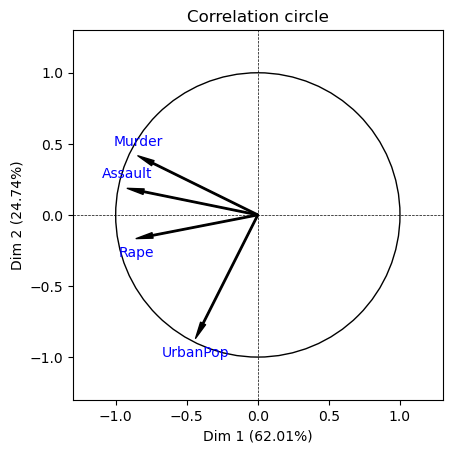

In [16]:
#cercle de corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [17]:
#contributions des variables
info_var[['col_contrib_dim1', 'col_contrib_dim2']]

,col_contrib_dim1,col_contrib_dim2
Murder,28.718825,17.487524
Assault,34.010315,3.533859
UrbanPop,7.739016,76.179065
Rape,29.531844,2.799553


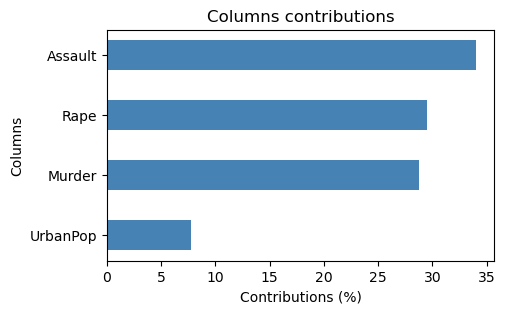

In [18]:
#sous forme graphique et ordonnée
acp.plot_col_contrib(num_axis=1,figsize=(5,3))

In [19]:
#les cos2
info_var[['col_cos2_dim1', 'col_cos2_dim2']]

,col_cos2_dim1,col_cos2_dim2
Murder,0.712296,0.173085
Assault,0.843538,0.034977
UrbanPop,0.191946,0.753994
Rape,0.732461,0.027709


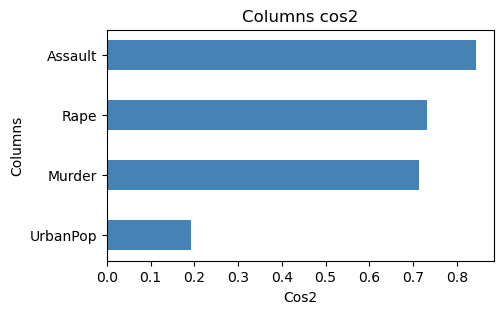

In [25]:
#aussi graphique
acp.plot_col_cos2(num_axis=1,figsize=(5,3))

In [20]:
#cumul pour les 2 premiers axes
info_var[['col_cos2_dim1', 'col_cos2_dim2']].cumsum(axis=1)

,col_cos2_dim1,col_cos2_dim2
Murder,0.712296,0.885382
Assault,0.843538,0.878515
UrbanPop,0.191946,0.945940
Rape,0.732461,0.760170


In [21]:

#coordonnées et autres infos
info_indiv = acp.row_topandas()
info_indiv.columns


Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_contrib_dim1', 'row_contrib_dim2', 'row_contrib_dim3',
       'row_contrib_dim4', 'row_cos2_dim1', 'row_cos2_dim2', 'row_cos2_dim3',
       'row_cos2_dim4'],
      dtype='object')

In [28]:
#coordonnées dans le plan
info_indiv[['row_coord_dim1', 'row_coord_dim2']]   

,row_coord_dim1,row_coord_dim2
rownames,,
Alabama,-0.985566,1.133392
Alaska,-1.950138,1.073213
Arizona,-1.763164,-0.745957
Arkansas,0.141420,1.119797
California,-2.523980,-1.542934
Colorado,-1.514563,-0.987555
Connecticut,1.358647,-1.088928
Delaware,-0.047709,-0.325359
Florida,-3.013042,0.039229


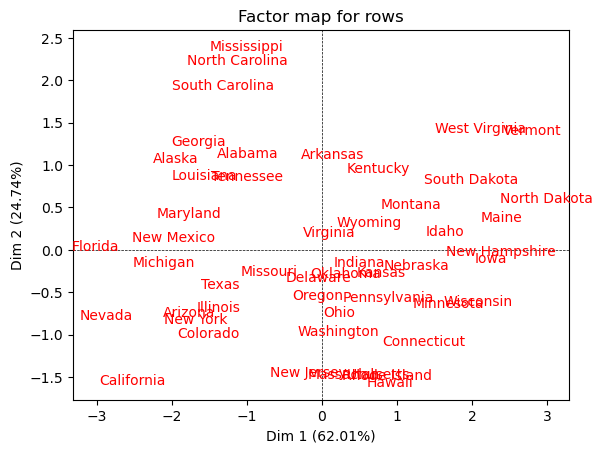

In [29]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=2)

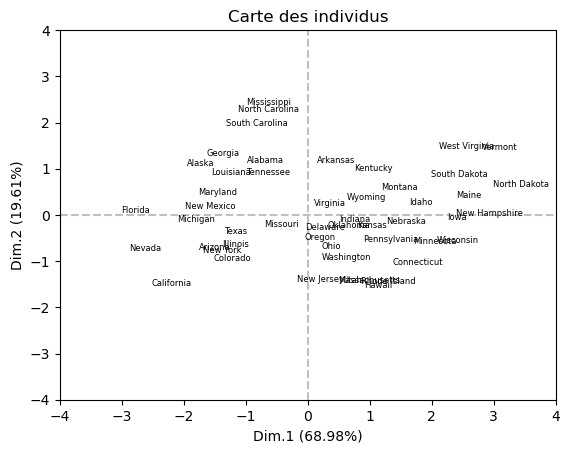

In [37]:
#coordonnées dans le plan
coord = info_indiv[['row_coord_dim1', 'row_coord_dim2']]

#pour ne pas être trompé par la mise à l'échelle auto du graphique
import matplotlib.pyplot as plt
axe = plt.gca()

#délimiter
axe.axis([-4,+4,-4,+4])
axe.plot([-4,+4],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-4,+4],color='silver',linestyle='--')
axe.set_xlabel("Dim.1 (68.98%)")
axe.set_ylabel("Dim.2 (19.61%)")
plt.title("Carte des individus")
for i in range(coord.shape[0]):
    axe.text(coord.iloc[i,0],coord.iloc[i,1],coord.index[i],fontsize=6)
plt.show()

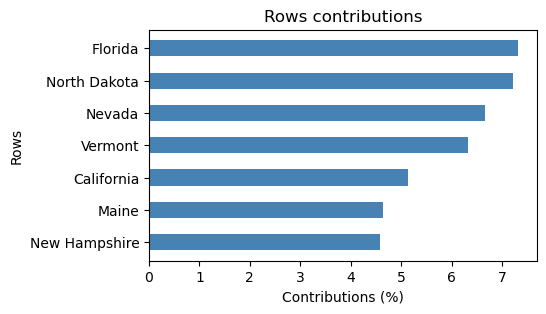

In [31]:
#contributions aux axes - CTR
acp.plot_row_contrib(num_axis=1,nb_values=7,figsize=(5,3))

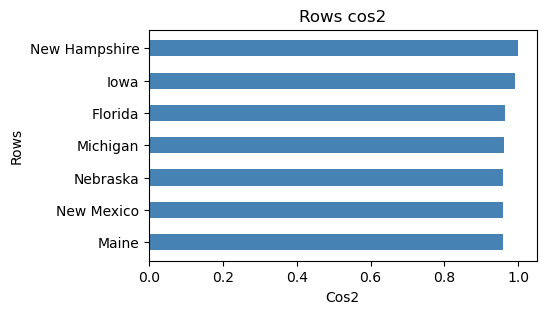

In [35]:
#qualité de représentation -- COS2
acp.plot_row_cos2(num_axis=1,nb_values=7,figsize=(5,3))

In [33]:
#les contributions sur les 2 premiers axes
contrib = info_indiv[['row_contrib_dim1', 'row_contrib_dim2']]
contrib.head()

,row_contrib_dim1,row_contrib_dim2
rownames,,
Alabama,0.783263,2.595723
Alaska,3.066667,2.327394
Arizona,2.506809,1.124411
Arkansas,0.016127,2.533823
California,5.136980,4.810526


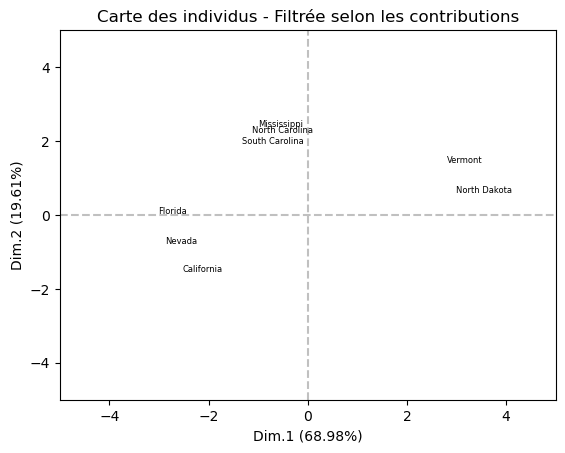

In [34]:
#graphique avec filtrage sur les contributions
axe = plt.gca()

#délimiter
axe.axis([-5,+5,-5,+5])
axe.plot([-5,+5],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-5,+5],color='silver',linestyle='--')
axe.set_xlabel("Dim.1 (68.98%)")
axe.set_ylabel("Dim.2 (19.61%)")
plt.title("Carte des individus - Filtrée selon les contributions")
for i in range(coord.shape[0]):
    if (contrib.iloc[i,0] > 5.0) or (contrib.iloc[i,1] > 5.0):
        axe.text(coord.iloc[i,0],coord.iloc[i,1],coord.index[i],fontsize=6)
plt.show()